In [159]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [272]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline


In [273]:
iris_df=pd.read_csv("iris.csv")
random_sample=iris_df.sample(10,axis=0)
random_sample

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
120,121,6.9,3.2,5.7,2.3,Iris-virginica
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa
133,134,6.3,2.8,5.1,1.5,Iris-virginica
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [278]:
print("Median of SepalLengthCm column is:",iris_df["SepalLengthCm"].median())
print("Median of SepalWidthCm column is:",iris_df["SepalWidthCm"].median())
print("Median of PetalLengthCm column is:",iris_df["PetalLengthCm"].median())
print("Median of PetalWidthCm column is:",iris_df["PetalWidthCm"].median())

Median of SepalLengthCm column is: 5.8
Median of SepalWidthCm column is: 3.0
Median of PetalLengthCm column is: 4.35
Median of PetalWidthCm column is: 1.3


In [279]:
print("Any null values present in iris dataframe?:\n",iris_df.isnull().any())
   

Any null values present in iris dataframe?:
 Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool


In [280]:
for col in iris_df.columns:
    if (iris_df[col].isnull().any()):
        iris_df[col].fillna(iris_df[col].median(),inplace=True)

In [201]:
print("Any null values present in iris dataframe?:\n",iris_df.isnull().any())


Any null values present in iris dataframe?:
 Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [281]:
iris_dummy=pd.get_dummies(data=iris_df["Species"],dummy_na=True)
iris_dummy = iris_dummy.rename(columns = {'Iris-setosa' : 'Iris_setosa','Iris-versicolor':'Iris_versicolor','Iris-virginica':'Iris_virginica'})

iris_df=pd.concat([iris_df,iris_dummy.iloc[:,0:3]],axis=1)
iris_df.columns
iris_df.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris_setosa,Iris_versicolor,Iris_virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1,0,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1,0,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1,0,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1,0,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1,0,0


In [282]:
iris_df.replace(to_replace="Iris-setosa",value=0,inplace=True)
iris_df.replace(to_replace="Iris-versicolor",value=1,inplace=True)
iris_df.replace(to_replace="Iris-virginica",value=2,inplace=True)

iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris_setosa,Iris_versicolor,Iris_virginica
0,1,5.1,3.5,1.40,0.2,0,1,0,0
1,2,4.9,3.0,1.40,0.2,0,1,0,0
2,3,4.7,3.2,1.30,0.2,0,1,0,0
3,4,4.6,3.1,1.50,0.2,0,1,0,0
4,5,5.0,3.6,1.40,0.2,0,1,0,0
5,6,5.4,3.9,1.70,0.4,0,1,0,0
6,7,4.6,3.4,1.40,0.3,0,1,0,0
7,8,5.0,3.4,1.50,0.2,0,1,0,0
8,9,4.4,2.9,1.40,0.2,0,1,0,0
9,10,4.9,3.1,1.50,0.1,0,1,0,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [284]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris_setosa,Iris_versicolor,Iris_virginica
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753,-0.813788,-0.015957,0.821728
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061,-0.715124,0.079059,0.629920
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318,0.594749,-0.461972,-0.131494
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477,-0.922101,0.197662,0.717440
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513,-0.887006,0.113464,0.766068
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000,-0.866044,-0.011247,0.868815
Iris_setosa,-0.813788,-0.715124,0.594749,-0.922101,-0.887006,-0.866044,1.000000,-0.490196,-0.504878
Iris_versicolor,-0.015957,0.079059,-0.461972,0.197662,0.113464,-0.011247,-0.490196,1.000000,-0.504878
Iris_virginica,0.821728,0.629920,-0.131494,0.717440,0.766068,0.868815,-0.504878,-0.504878,1.000000


In [285]:
dummy_iris=iris_dummy[["Iris_setosa","Iris_versicolor","Iris_virginica"]]
for col_iris in iris_df.select_dtypes(float):
    for col_dummy in dummy_iris.columns:
        correlation=iris_df[[col_iris,col_dummy]].corr(method="pearson")
        print(correlation)
        print("\n\n")



               SepalLengthCm  Iris_setosa
SepalLengthCm       1.000000    -0.715124
Iris_setosa        -0.715124     1.000000



                 SepalLengthCm  Iris_versicolor
SepalLengthCm         1.000000         0.079059
Iris_versicolor       0.079059         1.000000



                SepalLengthCm  Iris_virginica
SepalLengthCm         1.00000         0.62992
Iris_virginica        0.62992         1.00000



              SepalWidthCm  Iris_setosa
SepalWidthCm      1.000000     0.594749
Iris_setosa       0.594749     1.000000



                 SepalWidthCm  Iris_versicolor
SepalWidthCm         1.000000        -0.461972
Iris_versicolor     -0.461972         1.000000



                SepalWidthCm  Iris_virginica
SepalWidthCm        1.000000       -0.131494
Iris_virginica     -0.131494        1.000000



               PetalLengthCm  Iris_setosa
PetalLengthCm       1.000000    -0.922101
Iris_setosa        -0.922101     1.000000



                 PetalLengthCm  Iris_versicolor
P

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [286]:
iris_df.var()

Id                 1938.000000
SepalLengthCm         0.676645
SepalWidthCm          0.185552
PetalLengthCm         3.076516
PetalWidthCm          0.577141
Species               0.675322
Iris_setosa           0.222203
Iris_versicolor       0.222203
Iris_virginica        0.226560
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029272888A20>,
      dtype=object)

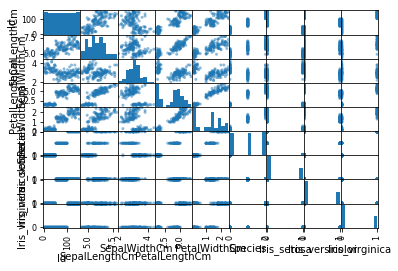

In [287]:
pd.plotting.scatter_matrix(iris_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [288]:
from sklearn.model_selection import train_test_split
independent_variables=iris_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
dependent_variables=iris_df["Species"]
X_train, X_test, Y_train, Y_test = train_test_split(independent_variables,dependent_variables,test_size=0.20)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [289]:
NNH = KNeighborsClassifier(n_neighbors = 11, weights = 'uniform', 
                           metric = 'euclidean')
NNH.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [290]:
predict_value=NNH.predict(X_test)
predict_value

array([2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 2, 2, 0, 0, 0, 0], dtype=int64)

In [291]:
NNH.predict([[1.0,2.0,5.0,4.0]])

array([1], dtype=int64)

In [292]:
Y_test

138    2
20     0
102    2
11     0
13     0
63     1
143    2
38     0
24     0
88     1
41     0
73     1
29     0
113    2
135    2
83     1
9      0
89     1
112    2
65     1
119    2
150    2
23     0
97     1
151    2
146    2
103    2
10     0
40     0
48     0
7      0
Name: Species, dtype: int64

In [293]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predict_value)


0.9032258064516129

## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

### Question 11: Read the data given in bc2.csv file

### Question 12: Observe the no.of records in dataset and type of each feature 

### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

### Check Missing Values

### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

### Question 15: Find the distribution of target variable (Class) 

#### Plot the distribution of target variable using histogram

### convert the datatype of Bare Nuclei to `int`

### Question 16: Standardization of Data

### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

### Question 18: Divide the dataset into feature set and target set

### Divide the Training and Test sets in 70:30 

## Question 19 - Finding Optimal value of k

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

### Question 20: Print the optimal number of neighbors